In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 250
plt.rcParams['figure.figsize'] = (10,5)
%matplotlib inline

In [5]:
df = pd.read_csv(r"E:\Data Science\Datasets\Mall_Data.csv", index_col= 0)

In [6]:
df

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

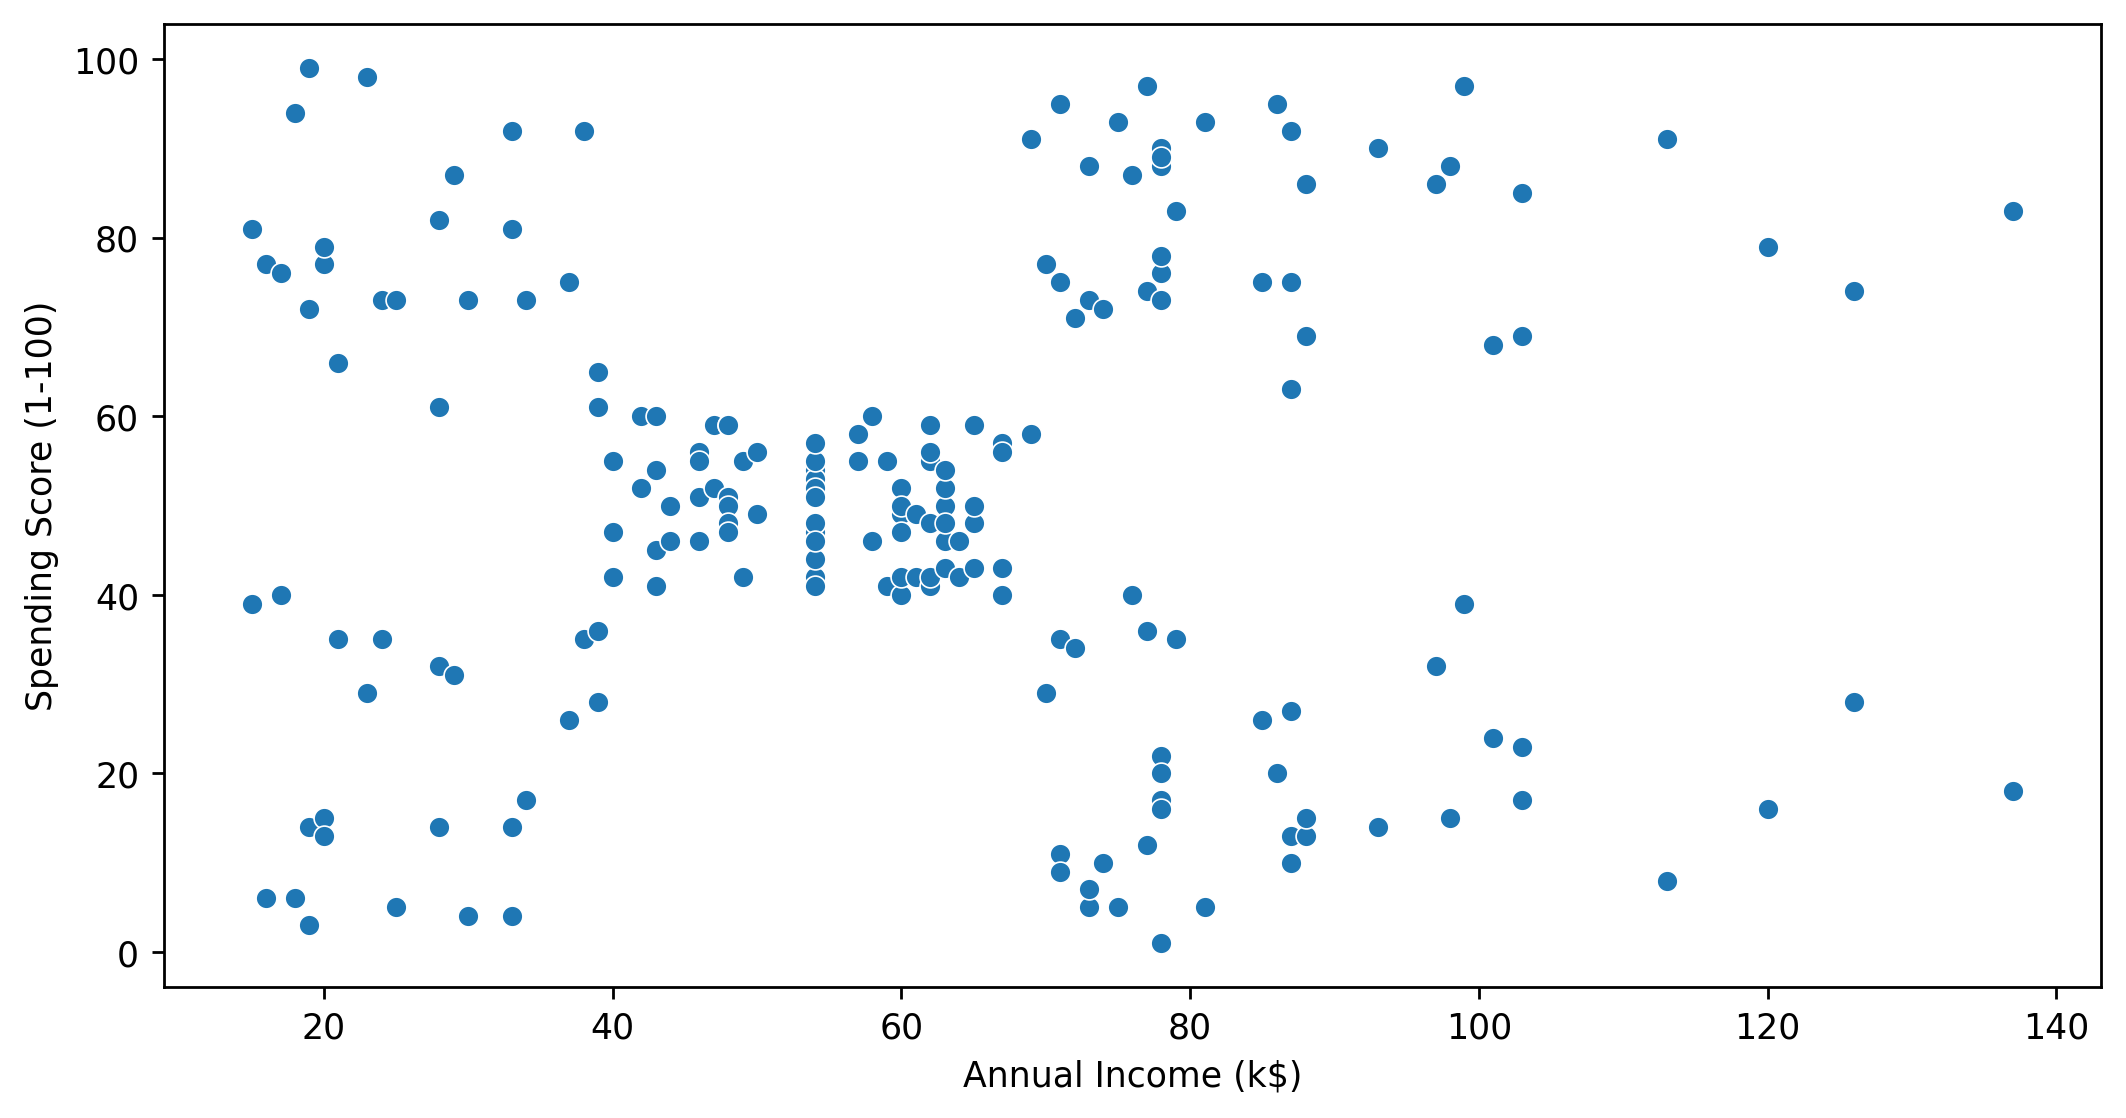

In [10]:
# Data Visualization

sns.scatterplot(x = df['Annual Income (k$)'],y = df['Spending Score (1-100)'])

In [11]:
# Standardization

from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [14]:
x = sc.fit_transform(df)
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [16]:
# Model Building

from sklearn.cluster import KMeans

In [19]:
km = KMeans()
yp = km.fit_predict(x)

In [20]:
yp

array([2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6,
       2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 7, 1, 1, 1, 1,
       1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 4, 7, 4, 0, 4, 0, 4,
       7, 4, 0, 4, 0, 4, 0, 4, 0, 4, 7, 4, 0, 4, 7, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 7, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3])

In [21]:
# Cluster Centre

km.cluster_centers_

array([[ 0.7489536 , -1.45651437],
       [-0.49804891,  0.06175337],
       [-1.32954532, -1.16358805],
       [ 1.87564575,  1.23452563],
       [ 0.68673384,  1.241219  ],
       [ 1.87564575, -1.09476801],
       [-1.35366972,  1.15873115],
       [ 0.1206509 , -0.15673077]])

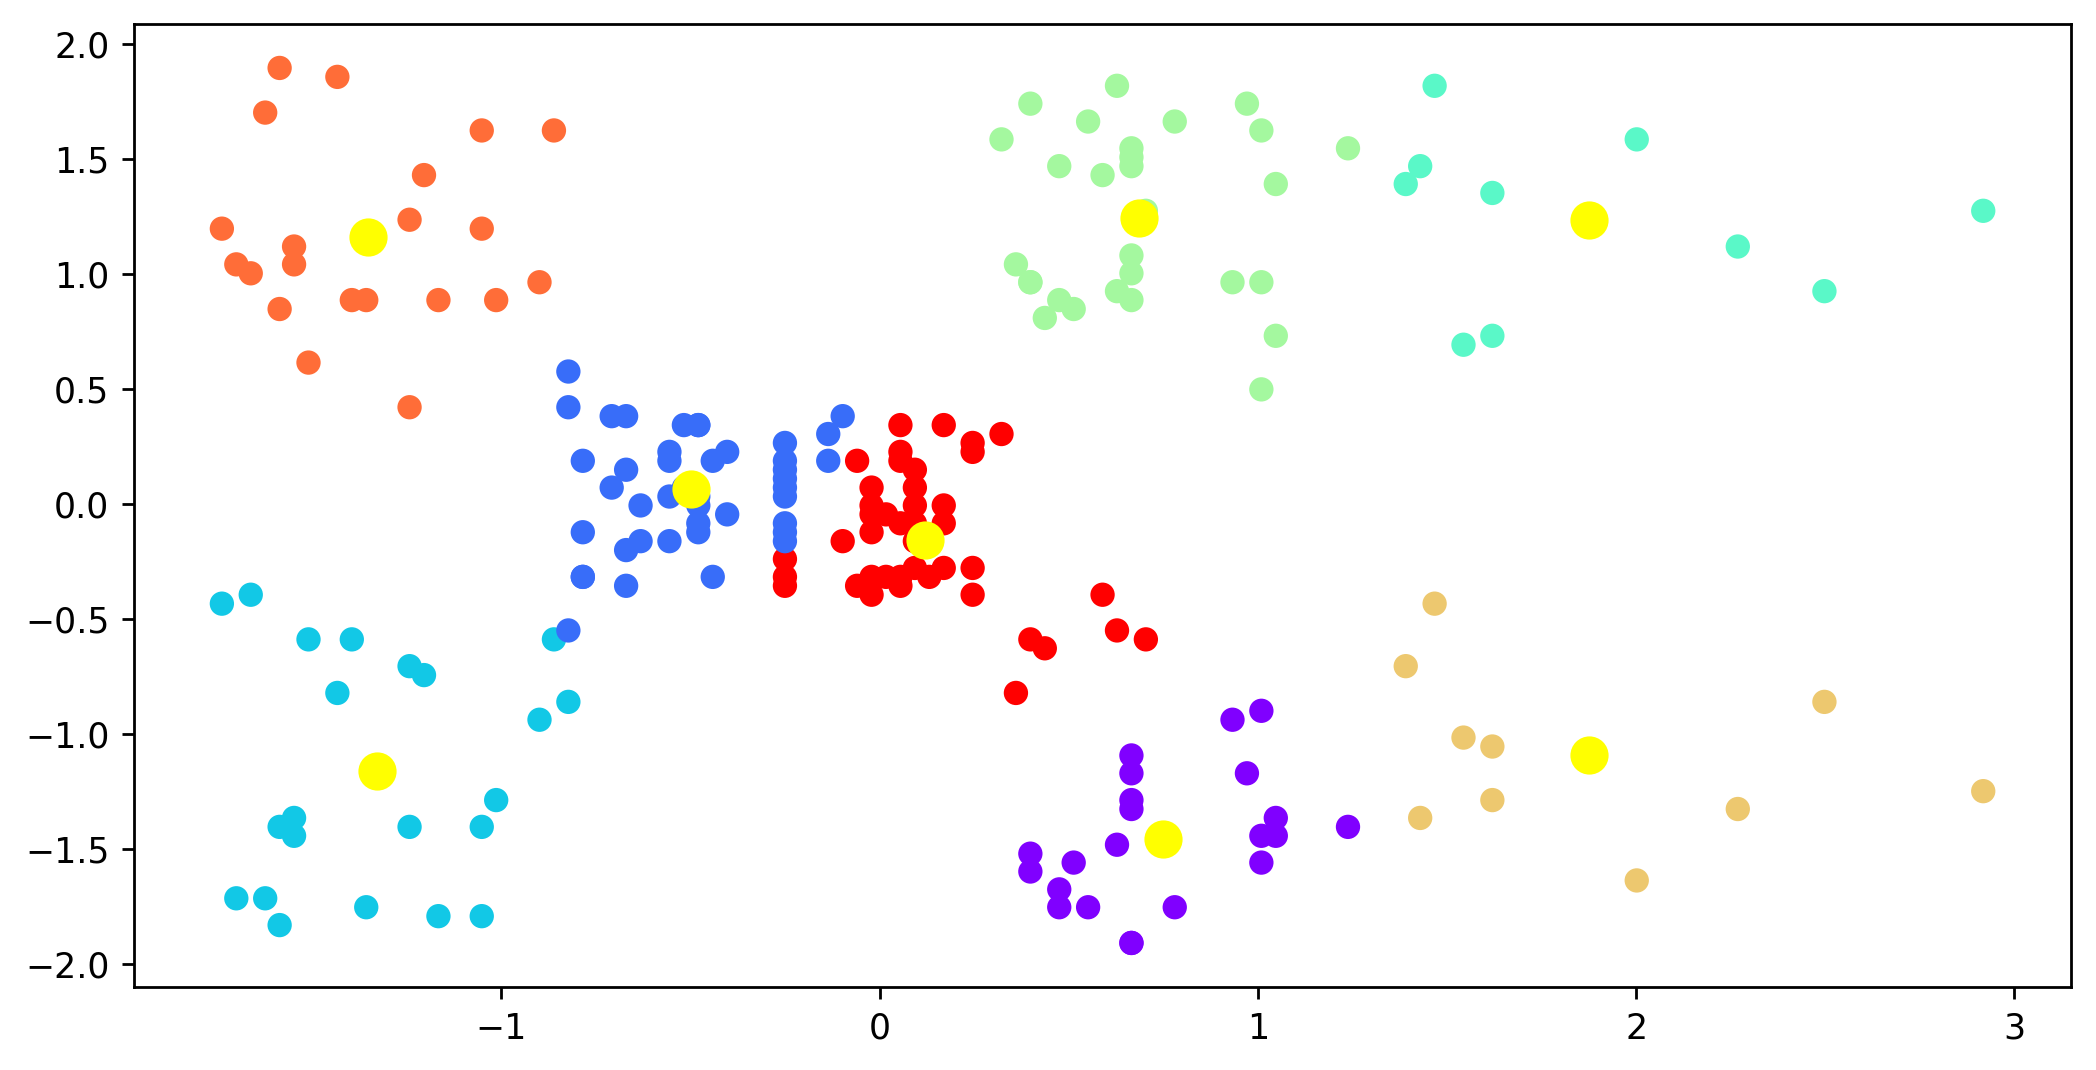

In [24]:
# Visualizing the clusters

plt.scatter(x[:,0], x[:,1], c = yp, cmap = 'rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = 'yellow', s = 100)

In [27]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [28]:
wcss

[399.99999999999994,
 269.0167937490666,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.067795914519664,
 44.91271612308711,
 37.196781682712135,
 32.33081392367576,
 29.316377372329583]

Text(0.5, 1.0, 'Elbow Graph')

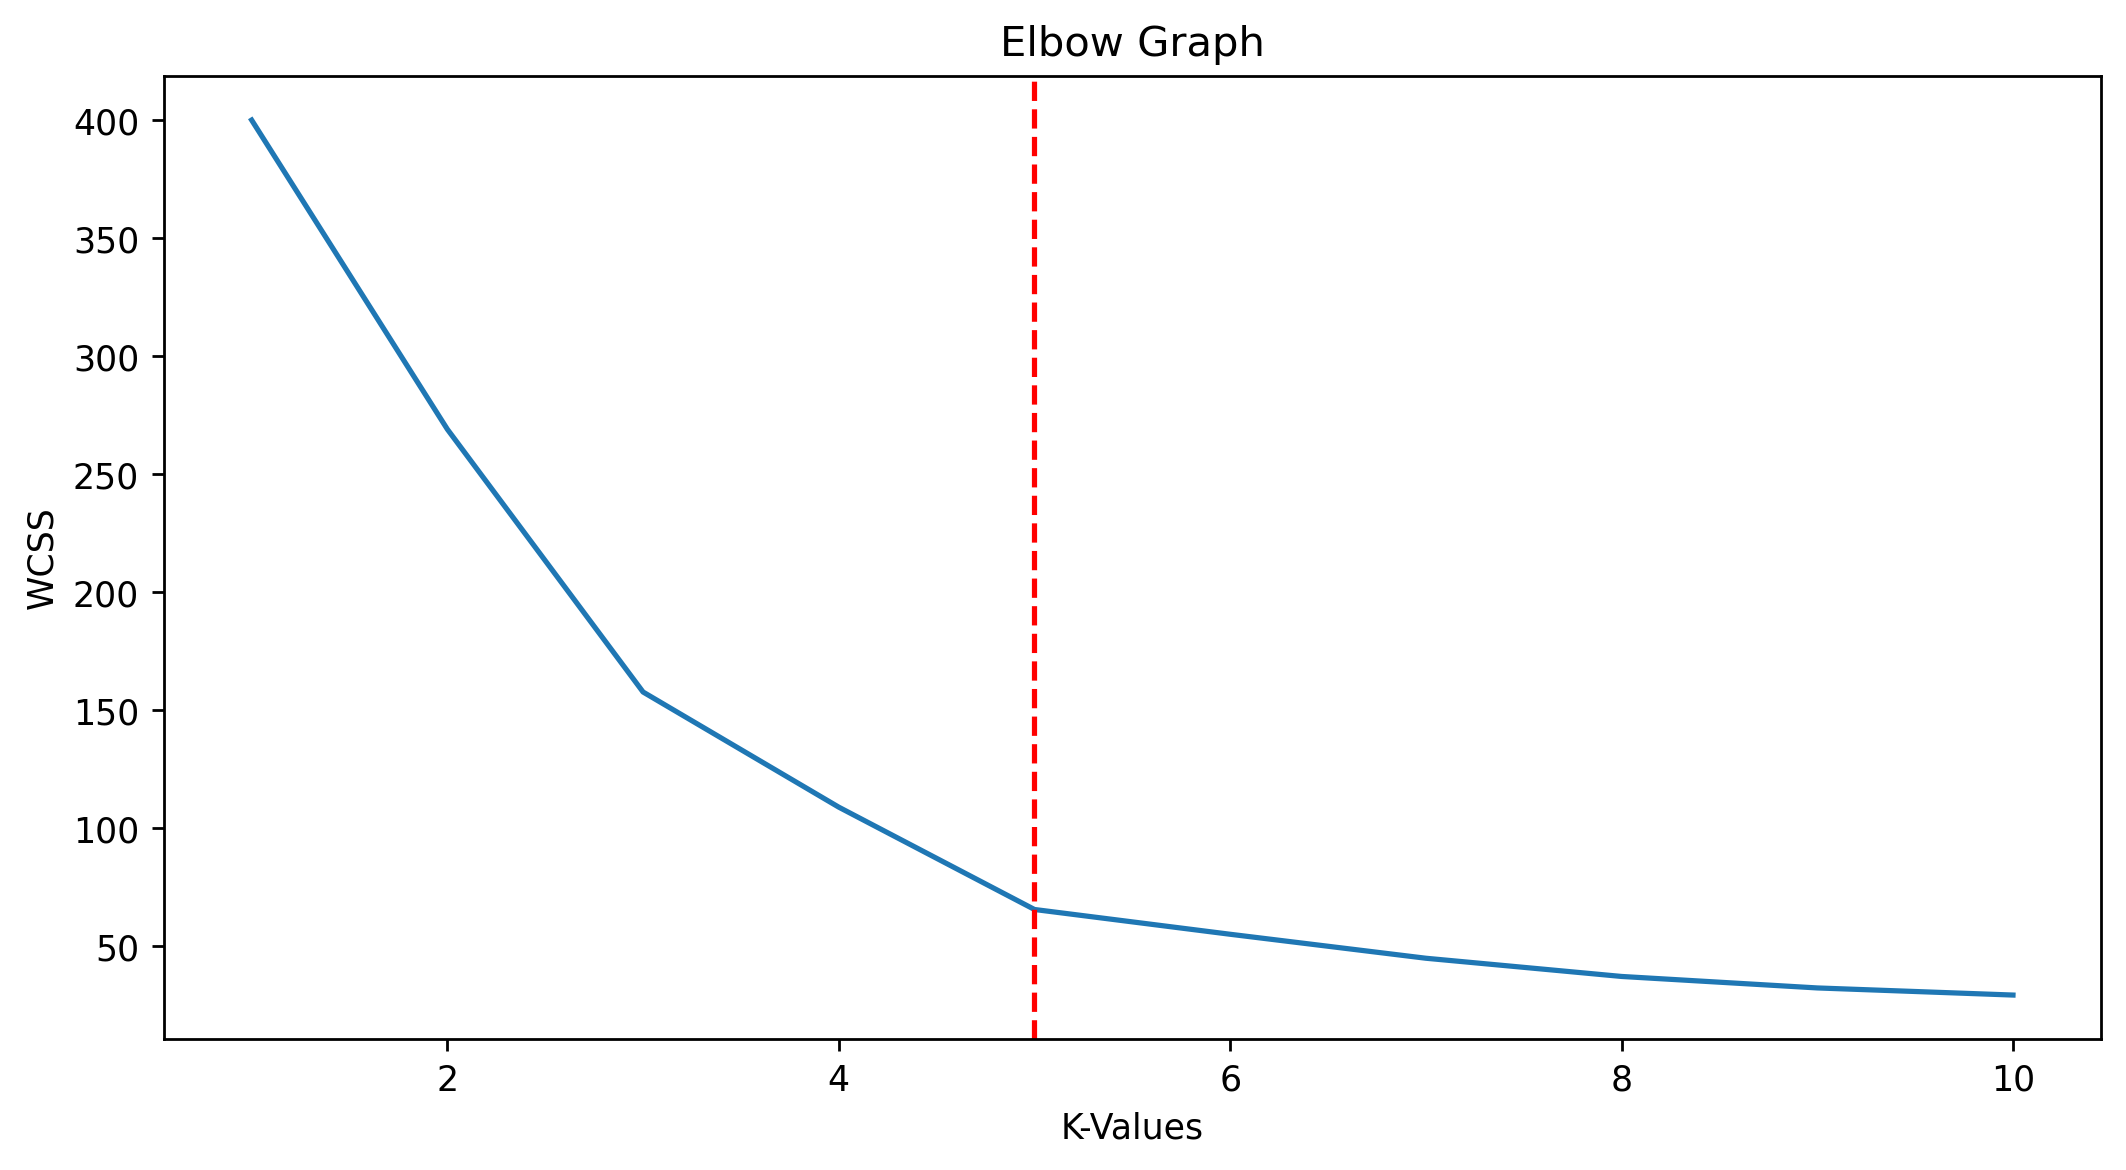

In [33]:
plt.plot(range(1,11),wcss)
plt.axvline(x=5, linestyle ='--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

# Final Model

In [34]:
km = KMeans(n_clusters=5)

ypred = km.fit_predict(x)
ypred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

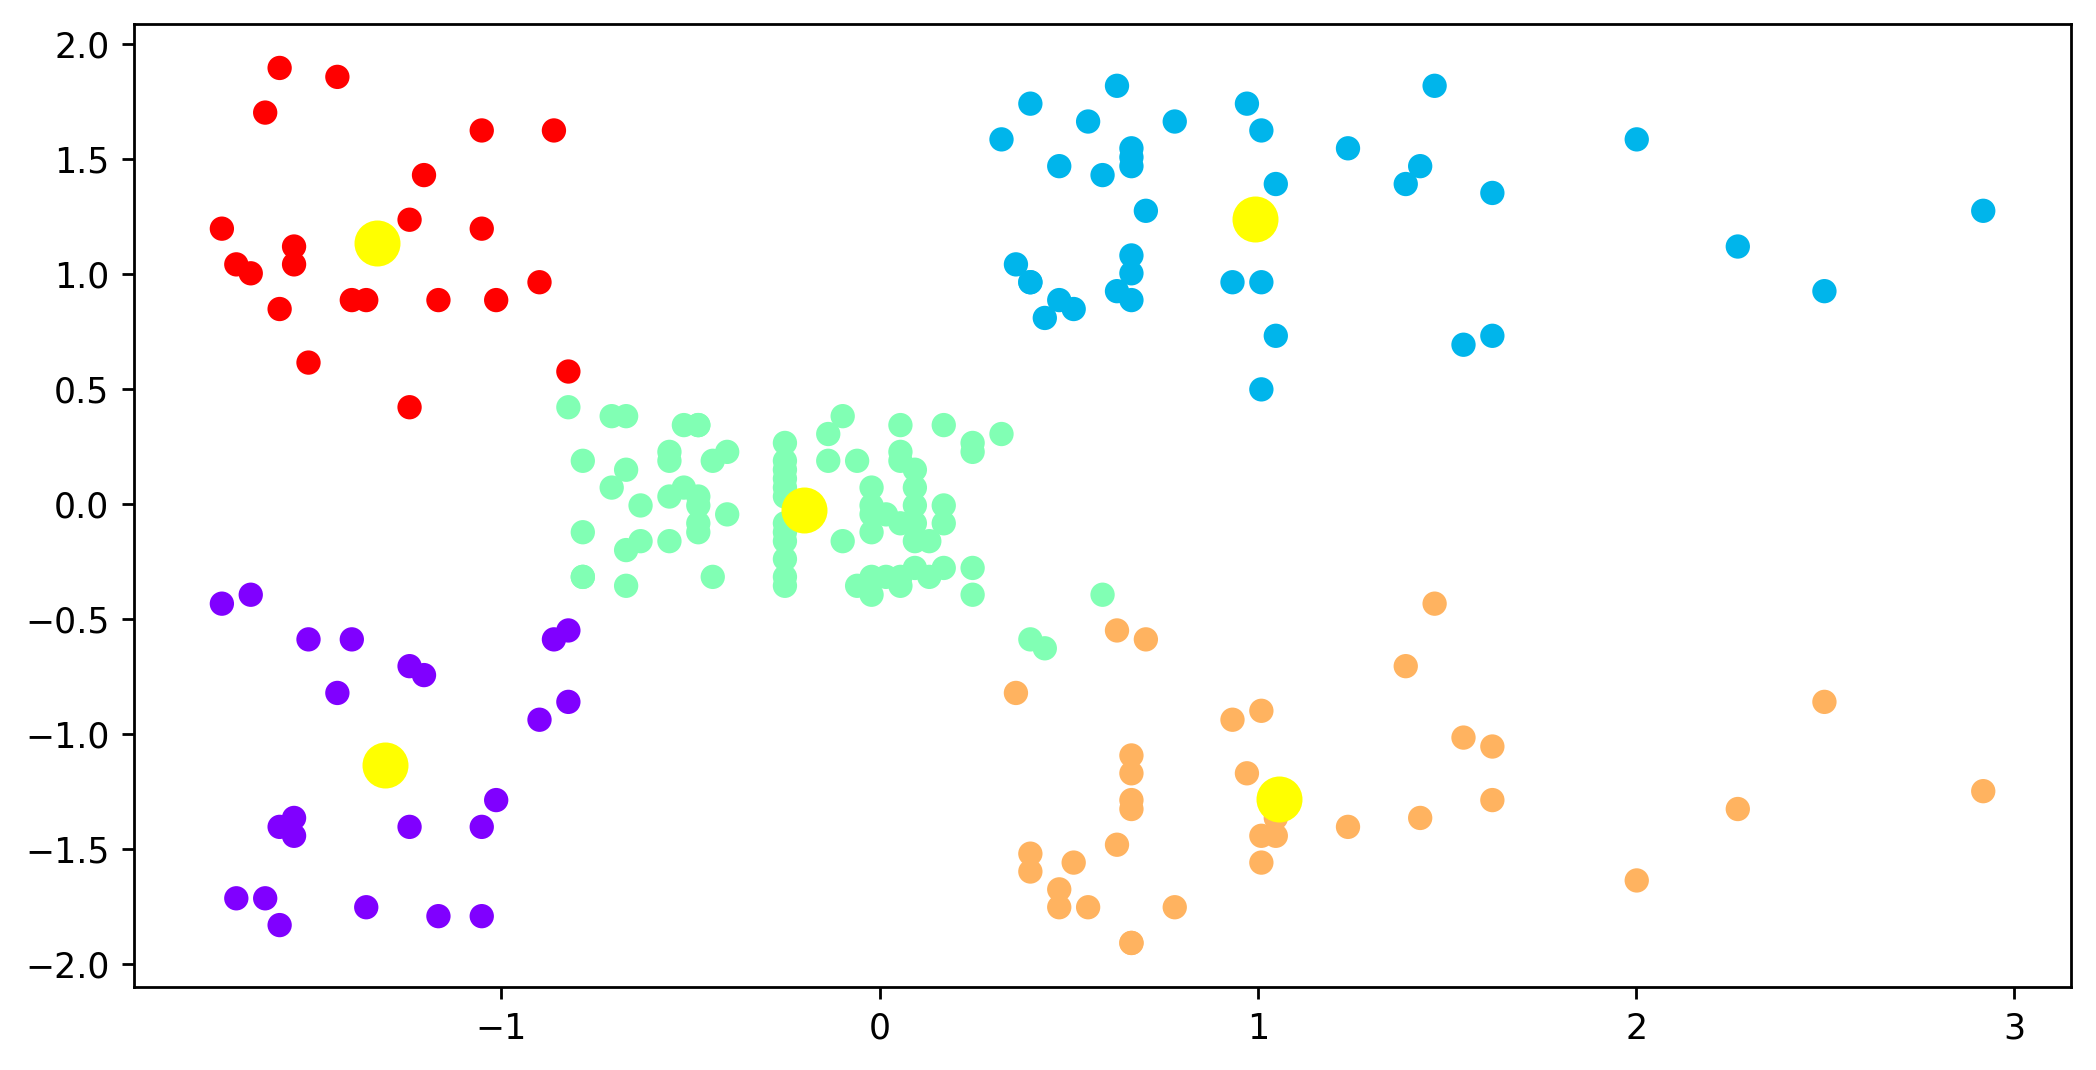

In [35]:
# Visualize the Cluster

plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 150)

# Evaluation Of K-means



In [36]:
# Silhouette Score

from sklearn.metrics import silhouette_score


In [37]:
silhouette_score(x,ypred)

0.5546571631111091

In [38]:
# Analyzing the cluster

df['Cluster'] = ypred
df

,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,
1,15,39,0
2,15,81,4
3,16,6,0
4,16,77,4
5,17,40,0
...,...,...,...
196,120,79,1
197,126,28,3
198,126,74,1


In [41]:
df.groupby('Cluster').agg('mean')

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,26.304348,20.913043
1,86.538462,82.128205
2,55.296296,49.518519
3,88.200000,17.114286
4,25.727273,79.363636
